### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from scipy.io.wavfile import write
from scipy.signal import welch, lfilter

### Informações sobre o sinal

In [33]:
## Carregando o arquivo de áudio

#Carrega o arquivo
samplerate, data = wavfile.read('fur_elise.wav')

#Carrega o arquivo em dois canais (audio estereo)
print(f"numero de canais = {data.shape[1]}")

#Tempo total = numero de amostras / fs
length = data.shape[0] / samplerate
print(f"duracao = {length}s")
print('sample rate = ', samplerate)
print('numero de amostras =', data.shape[0])

numero de canais = 2
duracao = 34.0s
sample rate =  48000
numero de amostras = 1632000


/tmp/ipykernel_272/1081288053.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('fur_elise.wav')


### Sinal no domínio do tempo

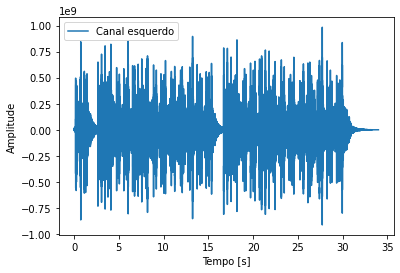

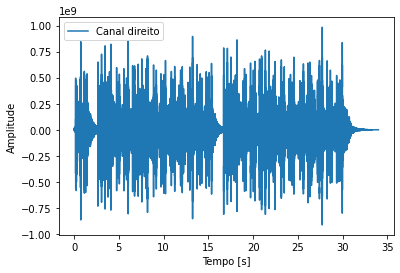

In [3]:
#Plota as figuras ao longo do tempo

#Interpola para determinar eixo do tempo
time = np.linspace(0., length, data.shape[0])

nsampples=data.shape[0]

#Seleciona os canais esquerdo e direito
data_l = data[:, 0]
data_r = data[:, 1]

#Plota os canais esquerdo e direito
plt.figure(1)
plt.plot(time[0:nsampples], data_l, label="Canal esquerdo")
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

plt.figure(2)
plt.plot(time[0:nsampples], data_r, label="Canal direito")
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

### Representação do sinal no domínio da frequência, welsh e rfft

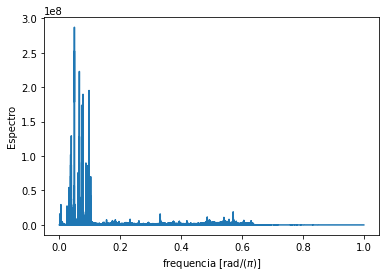

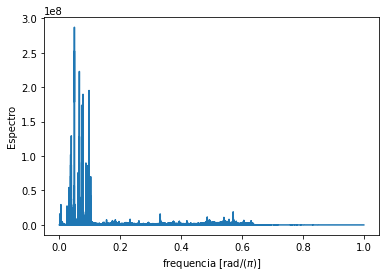

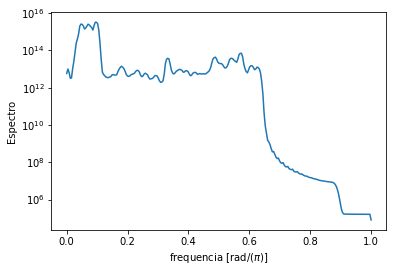

In [37]:
from scipy.fft import rfft, rfftfreq, irfft

n = data.shape[0]

normalized_l = np.int16((data_l / data_l.max()) * 32767)
normalized_r = np.int16((data_l / data_r.max()) * 32767)

t = n / samplerate

yf_l = rfft(normalized_l)
xf_l = rfftfreq(n, t)
xf_l = [x*t*2 for x in xf_l]

yf_r = rfft(normalized_l)
xf_r = rfftfreq(n, t)
xf_r = [x*t*2 for x in xf_r]

#Esquerdo 
plt.figure(4)
plt.plot(xf_l, np.abs(yf_l))
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()

#Direito
plt.figure(5)
plt.plot(xf_r, np.abs(yf_r))
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()
############################################################

#Estima o espectro do sinal utilizando a funcao welch
x  = data_l # canal esquerdo
fs = 2
#fs = samplerate
f, Pxx_spec = welch(x, fs, 'flattop', 512, scaling='spectrum')

#Plota o espectro do sinal para frequencias normalizadas entre 0 1 pi 
#(frequencias positivas)

plt.figure(6)
plt.semilogy(f, Pxx_spec)
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()

### Filtragem usando lfilter, para comparar com a implementação do overlap and add

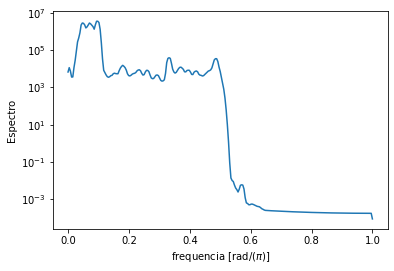

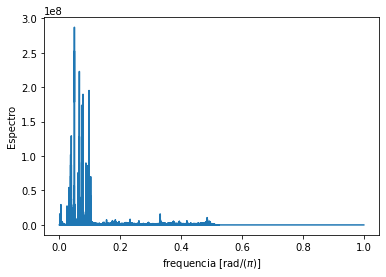

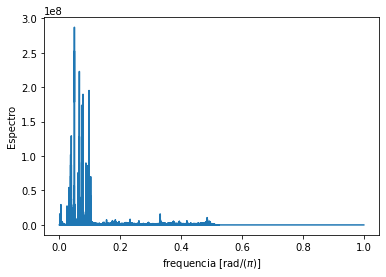

In [34]:
b = np.genfromtxt('coef.csv', delimiter=',')

#Filtra os dados dos canais esquerdo e direito
filtered_data_l = lfilter(b, 1, normalized_l)
filtered_data_r = lfilter(b, 1, normalized_r)

##############################################

#Estima o espectro do sinal utilizando a funcao welch
x  = filtered_data_l # canal esquerdo
fs = 2
#fs = samplerate
f, Pxx_spec = welch(x, fs, 'flattop', 512, scaling='spectrum')

#Plota o espectro do sinal para frequencias normalizadas entre 0 1 pi 
#(frequencias positivas)

plt.figure(5)
plt.semilogy(f, Pxx_spec)
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()

###########################################
#Sinal filtrado - Canal direito

yf_l = rfft(filtered_data_l)
xf_l = rfftfreq(n, t)
xf_l = [x*t*2 for x in xf_l]

plt.figure(15)
plt.plot(xf_l, np.abs(yf_l))
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()

#########################################
# Sinal filtrado - Canal esquerdo

yf_r = rfft(filtered_data_r)
xf_r = rfftfreq(n, t)
xf_r = [x*t*2 for x in xf_r]

plt.figure(15)
plt.plot(xf_l, np.abs(yf_r))
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()

#########################################


### Filtragem com a implementação de overlap and add, feita no arquivo 'convolution.py'

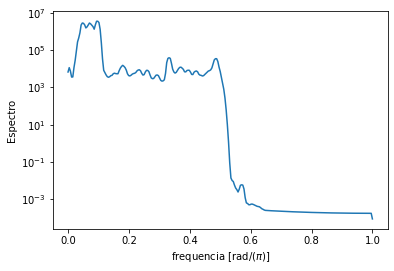

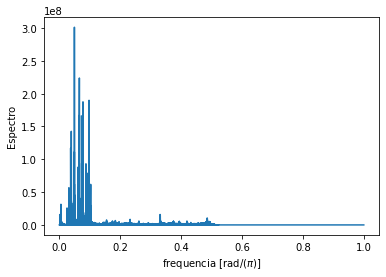

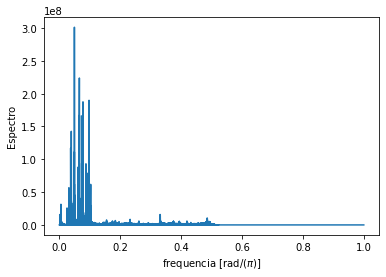

In [36]:
import convolution

h = np.genfromtxt('coef.csv', delimiter=',')

filtered_left = convolution.overlap_add(normalized_l, h, 878)

filtered_right = convolution.overlap_add(normalized_r, h, 878)


############################################################
#Estima o espectro do sinal utilizando a funcao welch
x  = filtered_left # canal esquerdo
fs = 2
#fs = samplerate
f, Pxx_spec = welch(x, fs, 'flattop', 512, scaling='spectrum')

#Plota o espectro do sinal para frequencias normalizadas entre 0 1 pi 
#(frequencias positivas)

plt.figure(5)
plt.semilogy(f, Pxx_spec)
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()

###########################################################
#FFT Sinal filtrado - Esquerdo

yf_l = rfft(filtered_left)
xf_l = rfftfreq(n + 146, t)
xf_l = [x*t*2 for x in xf_l]

plt.figure(15)
plt.plot(xf_l, np.abs(yf_l))
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()
#######################################################
#FFT Sinal filtrado - Direito

yf_r = rfft(filtered_right)
xf_r = rfftfreq(n + 146, t)
xf_r = [x*t*2 for x in xf_r]

plt.figure(16)
plt.plot(xf_r, np.abs(yf_r))
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()


### Sinais filtrados no domínio do tempo

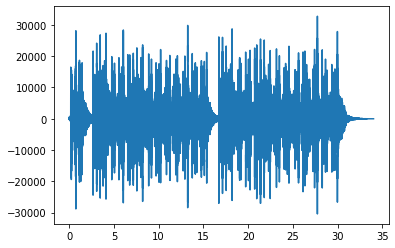

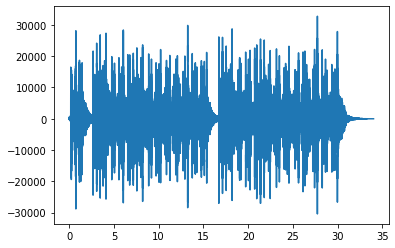

In [39]:
yt_l = irfft(yf_l)
yt_r = irfft(yf_r)

plt.figure(17)
plt.plot(time[0:nsampples],yt_l)

plt.figure(18)
plt.plot(time[0:nsampples],yt_r)

### Upsampling

In [46]:
##Upsampling 

y_up_l = np.zeros(2*len(normalized_l))

for i in range(0, len(normalized_l)):
    y_up_l[i*2] = normalized_l[i]
    
y_up_r = np.zeros(2*len(normalized_r))

for i in range(0, len(normalized_r)):
    y_up_r[i*2] = normalized_r[i]

print(len(y_up_l))
print(len(y_up_r))

print(y_up_l)
print(normalized_l)

3264000
3264000
[456.   0. 344. ...   0.   0.   0.]
[456 344 242 ...   0  -1   0]


### Filtragem 

In [53]:
y_inter_l = convolution.overlap_add(y_up_l, h, 878)
y_inter_r = convolution.overlap_add(y_up_r, h, 878)

#Ganho de 2

y_inter_l = [2*y_inter_l[n] for n in range(len(y_inter_l))]
y_inter_r = [2*y_inter_r[n] for n in range(len(y_inter_r))]

### Domínio da frequência - sinal interpolado

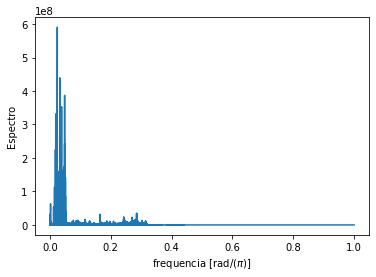

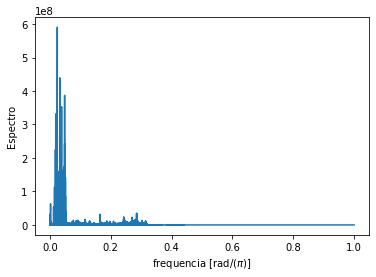

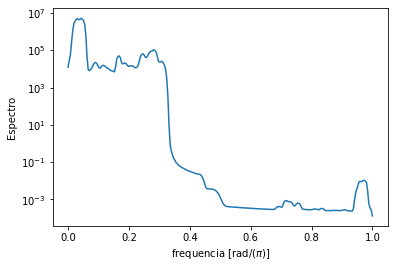

In [54]:
###########################################################
#FFT Sinal interpolado - Esquerdo

yf_l = rfft(y_inter_l)
xf_l = rfftfreq(n*2 + 146, t)
xf_l = [x*t*2 for x in xf_l]

plt.figure(25)
plt.plot(xf_l, np.abs(yf_l))
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()
#######################################################
#FFT Sinal interpolado - Direito

yf_r = rfft(y_inter_r)
xf_r = rfftfreq(n*2 + 146, t)
xf_r = [x*t*2 for x in xf_r]

plt.figure(26)
plt.plot(xf_r, np.abs(yf_r))
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()

############################################################
#Estima o espectro do sinal utilizando a funcao welch
x  = y_inter_l # canal esquerdo
fs = 2
#fs = samplerate
f, Pxx_spec = welch(x, fs, 'flattop', 512, scaling='spectrum')

#Plota o espectro do sinal para frequencias normalizadas entre 0 1 pi 
#(frequencias positivas)

plt.figure(5)
plt.semilogy(f, Pxx_spec)
plt.xlabel('frequencia [rad/($\pi$)]')
plt.ylabel('Espectro')
plt.show()

### Domínio do tempo - sinal interpolado


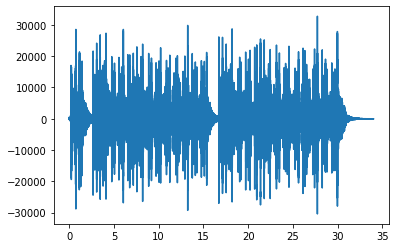

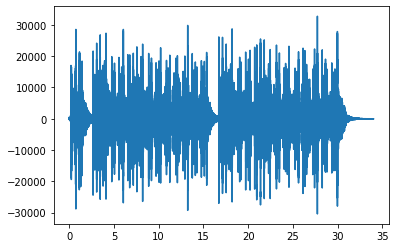

In [63]:
time = np.linspace(0., length, 2*data.shape[0] + 146)

yt_l = irfft(yf_l)
yt_r = irfft(yf_r)

plt.figure(17)
plt.plot(time,yt_l)

plt.figure(18)
plt.plot(time,yt_r)

### Gráfico para determinar valor ótimo de L

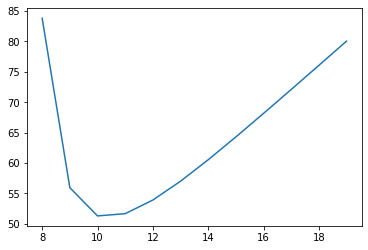

In [31]:
def f(i):
    return 4 * (2**i * (i + 1))/(2**i - 147 + 1)

xi = []
yi = []
for n in range(8,20):
    xi.append(n)
    yi.append(f(n))
    
plt.plot(xi,yi)

In [14]:
a = [3,3]
b = [2,5]
[a[n]+b[n] for n in range(len(a))]


[5, 8]